# Importing Standard Libraries

In [ ]:
# Standard Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

# Importing Data Sets

In [ ]:
# reading csv files

order_payments=pd.read_csv('olist_order_payments_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
# grouping the columns

items=order_items.groupby(by=['order_id'])[['order_item_id']].agg('count').reset_index()
order_payment=order_payments.groupby(by=['order_id'])[['payment_value']].agg('sum')

In [ ]:
# merging the datasets and creating master dataframe

df1=customers.merge(orders,on='customer_id')
df2=df1.merge(items,on='order_id')
final_df=df2.merge(order_payment,on='order_id')
final_df.shape

(98665, 14)

In [ ]:
# checking the datatype

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    98665 non-null  object 
 1   customer_unique_id             98665 non-null  object 
 2   customer_zip_code_prefix       98665 non-null  int64  
 3   customer_city                  98665 non-null  object 
 4   customer_state                 98665 non-null  object 
 5   order_id                       98665 non-null  object 
 6   order_status                   98665 non-null  object 
 7   order_purchase_timestamp       98665 non-null  object 
 8   order_approved_at              98651 non-null  object 
 9   order_delivered_carrier_date   97656 non-null  object 
 10  order_delivered_customer_date  96475 non-null  object 
 11  order_estimated_delivery_date  98665 non-null  object 
 12  order_item_id                  98665 non-null 

In [ ]:
# converting date columns to datetime

date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    final_df[col] = pd.to_datetime(final_df[col], format='%Y-%m-%d %H:%M:%S')
    
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    98665 non-null  object        
 1   customer_unique_id             98665 non-null  object        
 2   customer_zip_code_prefix       98665 non-null  int64         
 3   customer_city                  98665 non-null  object        
 4   customer_state                 98665 non-null  object        
 5   order_id                       98665 non-null  object        
 6   order_status                   98665 non-null  object        
 7   order_purchase_timestamp       98665 non-null  datetime64[ns]
 8   order_approved_at              98651 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97656 non-null  datetime64[ns]
 10  order_delivered_customer_date  96475 non-null  datetime64[ns]
 11  order_estimated

In [ ]:
final_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25


In [ ]:
# displaying missing value counts and corresponding percentage against total observations

missing_values = final_df.isnull().sum().sort_values(ascending = False)
percentage = round((final_df.isnull().sum()/final_df.isnull().count()*100),2).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage'])

,Values,Percentage
order_delivered_customer_date,2190,2.22
order_delivered_carrier_date,1009,1.02
order_approved_at,14,0.01
payment_value,0,0.00
order_item_id,0,0.00
order_estimated_delivery_date,0,0.00
order_purchase_timestamp,0,0.00
order_status,0,0.00
order_id,0,0.00
customer_state,0,0.00


In [ ]:
# dropping customer_id as it is not required for further analysis

final_df.drop(['customer_id'],axis=1,inplace=True)

In [ ]:
# displaying final shape of data

final_df.shape

(98665, 13)

In [ ]:
# displaying summary statistics of final dataframe

final_df.describe()

,customer_zip_code_prefix,order_item_id,payment_value
count,98665.000000,98665.000000,98665.000000
mean,35157.180185,1.141712,160.606904
std,29798.842131,0.538423,220.484252
min,1003.000000,1.000000,9.590000
25%,11360.000000,1.000000,62.000000
50%,24425.000000,1.000000,105.290000
75%,58995.000000,1.000000,176.880000
max,99990.000000,21.000000,13664.080000


In [ ]:
final_df.columns

Index(['customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'payment_value'],
      dtype='object')

In [ ]:
final_df['order_status'].value_counts()

delivered      96477
shipped         1106
canceled         461
invoiced         312
processing       301
unavailable        6
approved           2
Name: order_status, dtype: int64

In [ ]:
# final dataframe with oly delivered items

final_df=final_df[final_df['order_status']=='delivered']

In [ ]:
final_df.shape

(96477, 13)

# RFM Analysis

### Recency Calculation

In [ ]:
# last purchase date 

final_df['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
final_df['order_purchase_timestamp'].min()

Timestamp('2016-10-03 09:44:50')

In [ ]:
last_date=dt.date(2018,8,30)
print(last_date)

2018-08-30


In [ ]:
# creating a new column having date of purchase

final_df['Date']=final_df['order_purchase_timestamp'].dt.date

In [ ]:
# grouping customers based on last purchase date

recency_df=final_df.groupby(by='customer_unique_id',as_index=False)['Date'].max()
recency_df.columns=['Customer_unique_id','LastPurchaseDate']
recency_df.head()

,Customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14


In [ ]:
# Recency calculation

recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last_date - x).days)
recency_df.head()

,Customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,115
2,0000f46a3911fa3c0805444483337064,2017-03-10,538
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,322
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,289


In [ ]:
#dropping LastPurchaseDate from the dataframe since it is not required for further analysis

recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [ ]:
recency_df.head()

,Customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115
2,0000f46a3911fa3c0805444483337064,538
3,0000f6ccb0745a6a4b88665a16c9f078,322
4,0004aac84e0df4da2b147fca70cf8255,289


In [ ]:
recency_df['Customer_unique_id'].nunique()

93357

In [ ]:
recency_df.describe()

,Recency
count,93357.000000
mean,238.473783
std,152.587935
min,1.000000
25%,115.000000
50%,219.000000
75%,347.000000
max,696.000000


### Frequency Calculation

In [ ]:
# frequency calculation using customer id and order id

frequency_df = final_df.groupby(by=['customer_unique_id']).order_id.count().reset_index()
frequency_df.columns = ['Customer_unique_id','Frequency']

In [ ]:
frequency_df.head()

,Customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
frequency_df['Customer_unique_id'].nunique()

93357

In [ ]:
frequency_df.describe()

,Frequency
count,93357.000000
mean,1.033420
std,0.209099
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [ ]:
frequency_df['Frequency'].value_counts()

1     90556
2      2573
3       181
4        28
5         9
6         5
7         3
15        1
9         1
Name: Frequency, dtype: int64

### Monetary Calculation

In [ ]:
# monetary calculation using customer id and payment value

monetary_df = final_df.groupby('customer_unique_id').payment_value.sum().reset_index()
monetary_df.columns = ['Customer_unique_id','Monetary']

In [ ]:
monetary_df.head()

,Customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
monetary_df.describe()

,Monetary
count,93357.000000
mean,165.198772
std,226.314579
min,9.590000
25%,63.060000
50%,107.780000
75%,182.560000
max,13664.080000


### RFM Table

In [ ]:
# creating RFM table from the identified values
# merging recency and frequency dataframe

rf_df=recency_df.merge(frequency_df,on='Customer_unique_id')
rf_df.head()

,Customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1
2,0000f46a3911fa3c0805444483337064,538,1
3,0000f6ccb0745a6a4b88665a16c9f078,322,1
4,0004aac84e0df4da2b147fca70cf8255,289,1


In [ ]:
# merging the rf dataframe with monetary dataframe

rfm_df=rf_df.merge(monetary_df,on='Customer_unique_id')
rfm_df.head()

,Customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [ ]:
# converting customer_unique_id as index

rfm_df.set_index('Customer_unique_id',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
Customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [ ]:
# verifying RFM table

final_df[final_df['customer_unique_id']=='0000366f3b9a7992bf8c76cfdf3221e2']

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,payment_value,Date
63518,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21,1,141.9,2018-05-10


In [ ]:
(last_date - dt.date(2018,5,10)).days == 112

True

As we can see our RFM table is correct. The first customer bought only once and before 112 days

# Customer Segmentation with RFM values

### Applying RFM Score formula

The simplest and effective way is to create customers segments from RFM Model by using Quartiles.  We assign a score from 1 to 5 to Recency, Frequency and Monetary. Five is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated by combining individual RFM score numbers.

### RFM Quartiles

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,115.0,1.0,63.06
0.50,219.0,1.0,107.78
0.75,347.0,1.0,182.56


In [ ]:
quantiles['Frequency'].value_counts()

1.0    3
Name: Frequency, dtype: int64

In [ ]:
quantiles.to_dict()

{'Recency': {0.25: 115.0, 0.5: 219.0, 0.75: 347.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 63.06, 0.5: 107.78, 0.75: 182.56}}

### Creation of RFM Segmentation table

Two segmentation of classes will be created since high recency is bad for business while high frequency and monetary value is good.

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]: 
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
# creating rfm segmentation table with the calculated rfm scores

rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles))

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
Customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4


In [ ]:
# combining rfm scores

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4,214


Best Recency Score = 4 , Best Frequency Score = 4 , Best Monetary Score = 4.

Ordering the customer based on the best score

In [ ]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer_unique_id,,,,,,,
c8460e4251689ba205045f3ea17884a1,22,4,4655.91,4,4,4,444
7b0eaf68a16e4808e5388c67345033c9,103,2,2340.08,4,4,4,444
906a8a4ec9f3d4c3e64fa6d1c4fe6009,41,2,2020.86,4,4,4,444
0341bbd5c969923a0f801b9e2d10a7b8,92,2,1999.68,4,4,4,444
525cda9909aa001ebed396f6e55eae01,23,2,1782.90,4,4,4,444
4facc2e6fbc2bffab2fea92d2b4aa7e4,17,4,1760.75,4,4,4,444
397b44d5bb99eabf54ea9c2b41ebb905,74,4,1756.53,4,4,4,444
87c9e7ba960e4c2e6bd786b162adc639,109,2,1653.98,4,4,4,444
fe81bb32c243a86b2f86fbf053fe6140,70,5,1590.76,4,4,4,444


**Segmenting customer into 6 different categories based on the calculated RFM scores**

In [ ]:
rfm_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93357 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     93357 non-null  int64  
 1   Frequency   93357 non-null  int64  
 2   Monetary    93357 non-null  float64
 3   R_Quartile  93357 non-null  int64  
 4   F_Quartile  93357 non-null  int64  
 5   M_Quartile  93357 non-null  int64  
 6   RFMScore    93357 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 5.7+ MB


In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  524
Loyal Customers:  2801
Big Spenders:  23339
Almost Lost:  423
Lost Customers:  337
Lost Cheap Customers:  5957


# Applying K_means clustering on RFM variables

In [ ]:
# data preprocessing

rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
Customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


**Visualizing feature distributions**

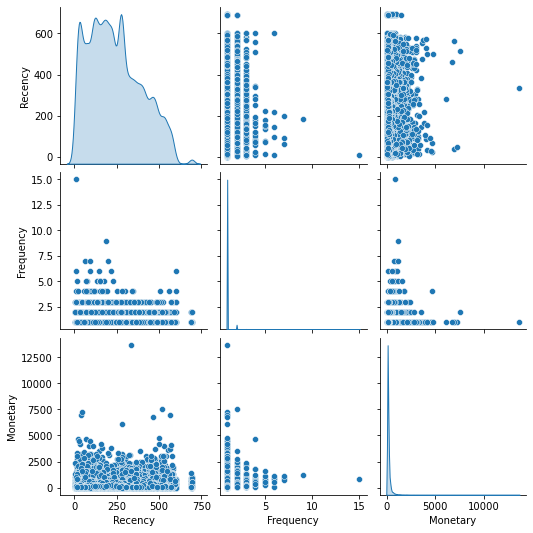

In [ ]:
# pair plot

sns.pairplot(rfm_data,diag_kind='kde')
plt.show()

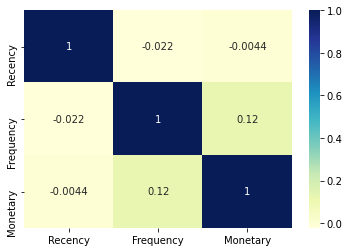

In [ ]:
# correlation plot

sns.heatmap(rfm_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
# processing outliers with IQR

# treating Recency 

Q1=rfm_data['Recency'].quantile(0.25)
Q3=rfm_data['Recency'].quantile(0.75)

IQR=Q3-Q1
UL=Q3+1.5*IQR

In [ ]:
# treating frequency

Q1=rfm_data['Frequency'].quantile(0.25)
Q3=rfm_data['Frequency'].quantile(0.75)

IQR=Q3-Q1
UL1=Q3+1.5*IQR

In [ ]:
# treating Monetary
    
Q1=rfm_data['Monetary'].quantile(0.25)
Q3=rfm_data['Monetary'].quantile(0.75)

IQR=Q3-Q1
UL2=Q3+1.5*IQR

In [ ]:
treated_rfm_data=rfm_data[(rfm_data['Recency']<UL) & (rfm_data['Monetary']<UL2)  ]

In [ ]:
type(treated_rfm_data)

pandas.core.frame.DataFrame

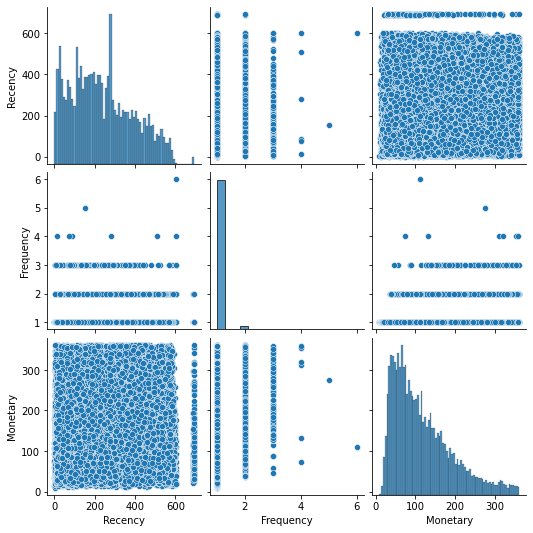

In [ ]:
sns.pairplot(treated_rfm_data)
plt.show()

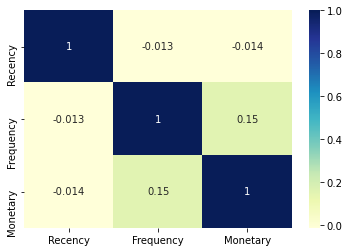

In [ ]:
sns.heatmap(treated_rfm_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

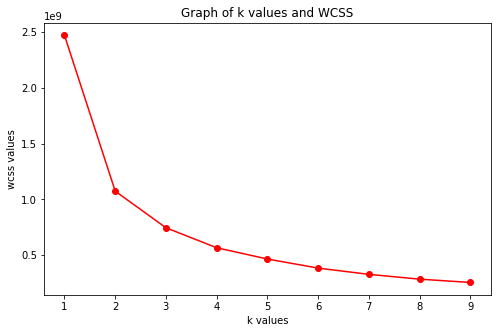

In [ ]:
X=treated_rfm_data


from sklearn.cluster import KMeans

wcss = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.figure(figsize=(8,5))
plt.plot(range(1,10), wcss, color='red',marker='o')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [ ]:
km=KMeans(n_clusters=3,n_init=15,random_state=2)
km.fit(X)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [ ]:
# adding cluster group with the rfm table

km = KMeans(n_clusters=3,n_init = 100,init='k-means++',random_state=0)
kmeans=km.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)


In [ ]:
# creating dataframe

colnames=treated_rfm_data.columns
X_df=pd.DataFrame(X,columns=colnames)
X_df['Group']=labels

X_df.head()

,Recency,Frequency,Monetary,Group
Customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,0
0000f46a3911fa3c0805444483337064,538,1,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2


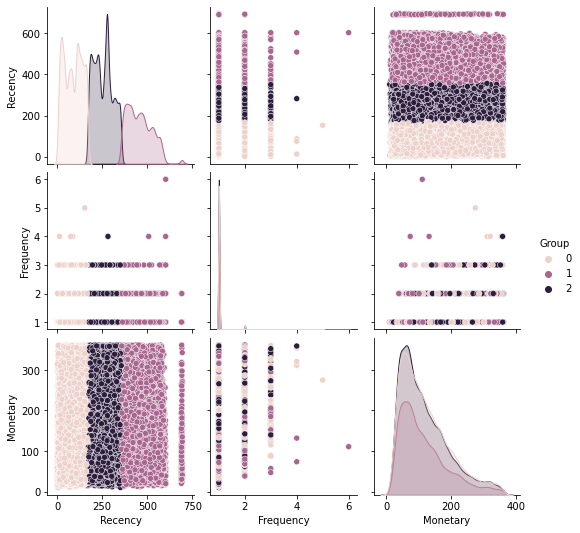

In [ ]:
sns.pairplot(X_df,hue='Group')
plt.show()

In [ ]:
X_df['Group'].value_counts()

0    32928
2    32679
1    20294
Name: Group, dtype: int64